<a href="https://colab.research.google.com/github/hurtado1820/RegresionLineal/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [ ]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

Lo primero que debemos hacer es leer nuestros datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos nuestro DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/studentsperformance.csv')

In [ ]:
df #Muestra todo el DataFrame cargado

In [ ]:
df.head(10) #Nos muestra la cantidad de registros que se indica, por defecto son 5

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.shape #Nos dice el numero de filas y columnas del DataFrame

(1000, 8)

In [ ]:
df.columns #Cuales son las columnas

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.dtypes #De que tipo son los datos en cada una de las columnas

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Pandas representa normalmente un dato ***string*** como tipo ***object***.

Esos tipos de datos provienen de Numpy

### Creando un histograma

Visualización de los datos. En este caso vamos a usar Seaborn 

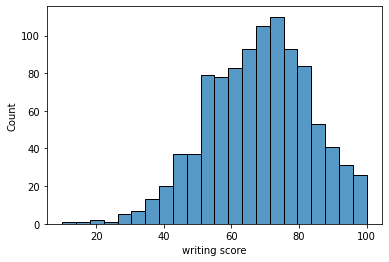

In [ ]:
sns.histplot(data=df, x='writing score') #Aqui visualizo los puntajes del writing

Comparacion en el mismo gráfico con dos columnas de los datos

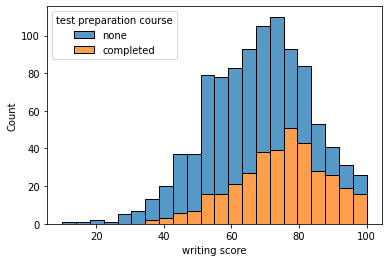

In [ ]:
sns.histplot(data=df, x='writing score', hue='test preparation course',multiple='stack')

### Visualizando nuestros datos

Gráfico de dispersión. En este caso la correlación (patrón) es positiva

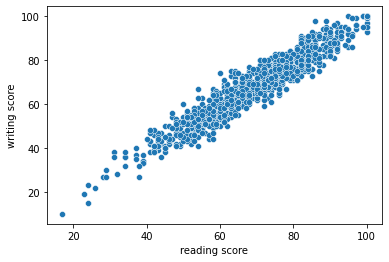

In [ ]:
sns.scatterplot(data=df, x='reading score', y='writing score')

### Creando una tabla de frecuencias

Muestra los valores de una distibución

In [ ]:
freq = df['writing score'].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True) #Deja los indices dentro del mismo DataFrame
df_freq = df_freq.rename(columns={'index': 'writing score', 'writing score': 'number of students'})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [ ]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [ ]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [ ]:
X = df['reading score'].values
Y = df['writing score'].values

#Muchos modelos de ML necesitan que los datos de entrada esten en un formato que no sea lista 
#Forma Tensor, queda como listas dentro de una lista
X = X.reshape(-1,1)

#Los datos debemos dividirlos en dos partes, seccion de entrenamiento y test
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


In [ ]:
#Regresión lineal, con Scikit-learn
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)

print('La pendiente es: ', reg.coef_)
print('El bias es: ', reg.intercept_)
#Coeficiente de regresión, nos dice quee tan relacionadas están las variables
print(reg.score(X_train, Y_train)) 


La pendiente es:  [0.99589904]
El bias es:  -0.8328023479006674
0.9146351908494582


## Visualización de nuestro modelo entrenado

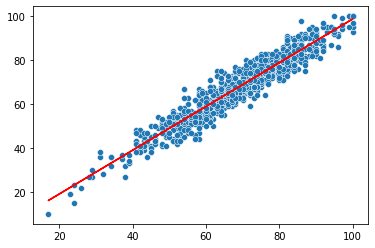

In [ ]:
x_flat = X_train.flatten()

y_hat = reg.predict(X_train)

#fig, ax = plt.subplots() 
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train,y_hat, color='r')

## Evaluación de nuestro modelo

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

#Calcular el error cuadratico medio
#Mide que tanto nos equivocamos de nuestros datos reales con nuestros datos de prediccion
print(mean_squared_error(Y_test, y_pred))

22.877639830632592


In [ ]:
value = pd.DataFrame({'Actuales test': Y_test.flatten(), 'Predict': y_pred.flatten()})
value

,Actuales test,Predict
0,81,77.843221
1,52,47.966250
2,34,38.007260
3,59,55.933443
4,75,77.843221
...,...,...
195,99,98.757101
196,77,75.851423
197,89,87.802212
198,68,71.867827
